## Lab 2 Report

Seth Richards and Anup Paudel

In [1]:
# Import Cell

%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal

## Summary

In this lab, we create and demonstrate signal time shifting and scaling functions, both playing their audio and graphing their outputs to show how the functions effected the original audio files. Then, we take a distorted audio file, apply the inverse transformation, and recover, play, and graph the output.

This lab shows that we understand signal shifting and scaling, as well as some basic python and math required to use said functions.

## Assignment 1 --  Time Scaling Audio Signals 

In [2]:
# Assignment 1 - Time Scaling Function

# Part A
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter 
# returns t: time samples vector corresponding to y: scaled signal

# y(t) = x(at) with sampling rate fs
def timescale(x,fs,a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t=np.arange(0,len(y),1)*1/fs
    return y,t


<IPython.core.display.Javascript object>


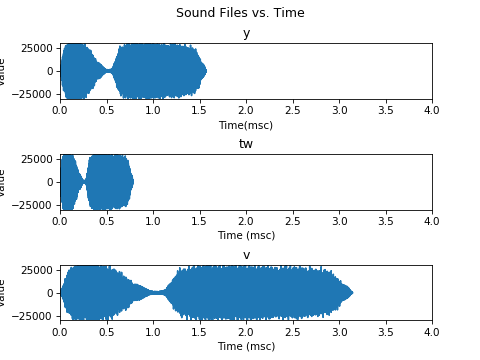

Text(0, 0.5, 'Value')

In [217]:
# Part B

fs,y = wav.read("train32.wav")
lenY = len(y)

# Scales signals
y,t_y = timescale(y,fs,1)
a = 2
w,t_w = timescale(y,fs,a)
a = 0.5
v,t_v = timescale(y,fs,a)


# Part C

wav.write('y.wav',fs,y.astype('int16'))
play_obj =sa.play_buffer(y, 1, 2, fs)

wav.write('w.wav',fs,w.astype('int16'))
play_obj =sa.play_buffer(np.int16(w), 1, 2, fs)

wav.write('v.wav',fs,v.astype('int16'))
play_obj =sa.play_buffer(np.int16(v), 1, 2, fs)


# Part D

fig2 = plt.figure(1)
fig2.subplots_adjust(hspace=1,wspace=0.4)
plt.suptitle("Sound Files vs. Time")


# Plots original signal
plt.subplot(3,1,1)
plt.plot(t_y,y)
plt.title('y')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time(msc)')
plt.ylabel('Value')

# Plots scaled by 2 signal
plt.subplot(3,1,2)
plt.plot(t_w,w)
plt.title('tw')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time (msc)')
plt.ylabel('Value')

# Plots scaled by 0.5 signal
plt.subplot(3,1,3)
plt.plot(t_v,v)
plt.title('v')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time (msc)')
plt.ylabel('Value')








###  Discussion

If the scaling factor were set to a = -1, then the returned graph would not be visible with the 0:4 second window we have set up. The function y(t) would instead be reflected across the y-axis, reversing the signal in time and advancing it. If a student ran the figure command before every subplot (with the same figure number), there is no difference. If the figure number is different, each subplot will be displayed in it's own figure, making three subplots that each take up a third of their respective figures space.

## Assignment 2: Time Shift Operation

In [153]:
# Part A

# x: input signal vector
# fs: sampling rate (in Hz)
# t0: shifting parameter 
# returns t: time samples vector corresponding to y: shifted signal

# y(t) = x(t + t0) with sampling rate fs
def timeshift(x,fs,t0):
    
    n0 = int(t0*fs)
    lenX = len(x)
    if t0 > 0: # t0 is +, advance
        y = np.zeros(np.abs(n0))
        y = np.concatenate([x[n0:lenX],y])  

    
    else: # t0 is -, delay
        y = np.zeros(np.abs(n0))
        y = np.concatenate([y,x])
        
    t=np.arange(0,len(y),1)*1/fs
    return y,t

<IPython.core.display.Javascript object>


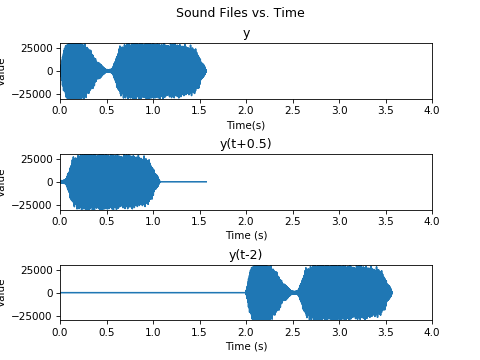

In [197]:
# Part B

fs,y = wav.read("train32.wav")

# Shifts signals
y,t_y = timescale(y,fs,1) #Timeshift of zero doesn't function, using scaling instead for ease of use
a, t_a = timeshift(y,fs,0.5)
b, t_b = timeshift(y,fs,-2)

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=1,wspace=0.4)
plt.suptitle("Sound Files vs. Time")


# Plot Original Signal
plt.subplot(3,1,1)
plt.plot(t_y,y)
plt.title('y')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time(s)')
plt.ylabel('Value')

# Plot y(t+0.5)
plt.subplot(3,1,2)
plt.plot(t_a,a)
plt.title('y(t+0.5)')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time (s)')
plt.ylabel('Value')

# Plot y(t-2)
plt.subplot(3,1,3)
plt.plot(t_b,b)
plt.title('y(t-2)')
plt.ylim(-30000,30000)
plt.xlim(0,4)
plt.xlabel('Time (s)')
plt.ylabel('Value')


# Part C

wav.write('y.wav',fs,y.astype('int16'))
play_obj =sa.play_buffer(y, 1, 2, fs)

wav.write('a.wav',fs,a.astype('int16'))
play_obj =sa.play_buffer(np.int16(a), 1, 2, fs)

wav.write('b.wav',fs,b.astype('int16'))
play_obj =sa.play_buffer(np.int16(b), 1, 2, fs)



###  Discussion

Trivial Case 1: Shift = 0, output should be original signal.
In our implementation, this does not currently work, which is why we used the timescale function to get our t_y and y to play and plot.

Trivial Case 2: Shift = advance bigger than original signal. 
If the shift is greater than the original signal, meaning the shift places the whole signal before t = 0, the output would be zero. In our case, that does hold true as our function would splice exactly zero points from the input array and concatenate the entire expected length with an array of zeros.

## 3.0 Recovering Popular TV/Movie Audio File

<IPython.core.display.Javascript object>


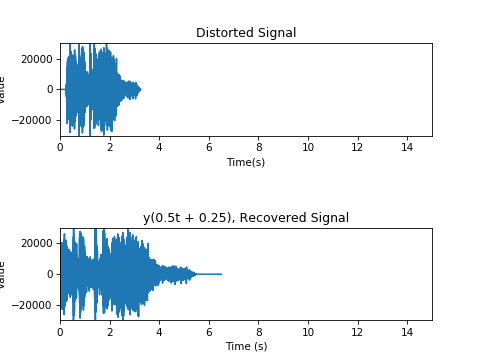

Text(0, 0.5, 'Value')

In [220]:
# Assignment 3 -- Title of assignment 3    g2

# Part A
fs,y = wav.read("s2.wav")
y,t = timescale(y,fs,1) # Original Distorted Signal


#ya = 2t-0.5 = 2(t-0.25)
#inverse is (t+0.5)/2 = 0.5t + 0.25 
ya,ta = timeshift(y,fs,.5)
ya,ta = timescale(ya,fs,.5)

#yb = 0.5t - 2 = 0.5(t - 4)
#inverse is (t + 2)/0.5 = 2t + 4
yb,tb = timeshift(y,fs,2)
yb,tb = timescale(yb,fs,2)

# Part B

wav.write('ya.wav',fs,ya.astype('int16'))
play_obj =sa.play_buffer(np.int16(ya), 1, 2, fs)
play_obj.wait_done()


#ya is the correct signal, so only write ya not yb

# wav.write('yb.wav',fs,yb.astype('int16'))
# play_obj =sa.play_buffer(np.int16(yb), 1, 2, fs)
# play_obj.wait_done()


# Part C

fig2 = plt.figure(3)
fig2.subplots_adjust(hspace=1,wspace=0.4)

# Plot Distorted Signal
plt.subplot(2,1,1)
plt.plot(t,y)
plt.title('Distorted Signal')
plt.ylim(-30000,30000)
plt.xlim(0,15)
plt.xlabel('Time(s)')
plt.ylabel('Value')

# Plot Recovered Signal
plt.subplot(2,1,2)
plt.plot(ta,ya)
plt.title('y(0.5t + 0.25), Recovered Signal')
plt.ylim(-30000,30000)
plt.xlim(0,15)
plt.xlabel('Time (s)')
plt.ylabel('Value')

### Discussion

The signal was distorted by x(2t- 0.5), which increased the speed/frequency of the signal meaning the signal was half as long and sounded higher pitched while adding a slight delay. Therefore, the correct inverse transformation was to slow it back down and remove the delay by advancing time.

This quote was from the third Harry Potter movie, "Harry Potter and the Prisoner of Azkaban".